In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("car_data.csv")
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [3]:
#shape of the data
df.shape

(1000, 5)

In [4]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [5]:
#univartite analysis on the columns
df.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


<Axes: >

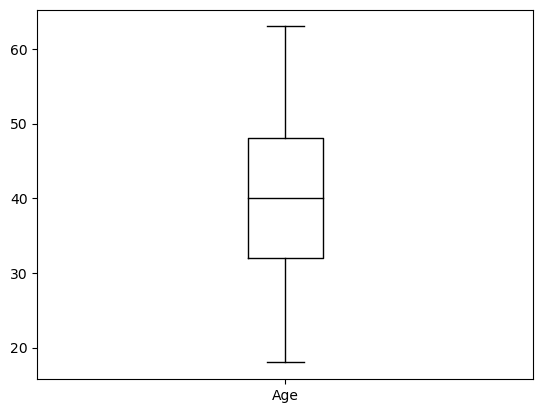

In [6]:
import matplotlib.pyplot as plt

df.boxplot(column=['Age'], grid=False, color='black')

In [7]:
df.boxplot(column=['AnnualSalary'], grid=False, color='black')

<Axes: >

In [8]:
df.boxplot(column=['Purchased'], grid=False, color='black')

<Axes: >

In [9]:
#bivartite analysis
sns.countplot(data=df,x='Gender')

<Axes: xlabel='Gender', ylabel='count'>

In [10]:
sns.histplot(x='AnnualSalary', data=df, hue='Gender', bins=20)

<Axes: xlabel='Gender', ylabel='count'>

In [11]:
sns.histplot(x='Age', data=df, hue='Gender', bins=20)

<Axes: xlabel='Gender', ylabel='count'>

In [12]:
sns.histplot(x='AnnualSalary', data=df, hue='Purchased', bins=20)

<Axes: xlabel='Gender', ylabel='count'>

In [13]:
sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: 'Male'

In [14]:
sns.pairplot(df)

C:\Users\rithe\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [15]:
#checking null values
df.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [16]:
#checking for duplicates
df.duplicated().sum()

0

In [17]:

df_final = pd.get_dummies(df, columns = ["Gender"], drop_first = True)
df_final.head()


,User ID,Age,AnnualSalary,Purchased,Gender_Male
0,385,35,20000,0,True
1,681,40,43500,0,True
2,353,49,74000,0,True
3,895,40,107500,1,True
4,661,25,79000,0,True


In [18]:
df_final.head()

,User ID,Age,AnnualSalary,Purchased,Gender_Male
0,385,35,20000,0,True
1,681,40,43500,0,True
2,353,49,74000,0,True
3,895,40,107500,1,True
4,661,25,79000,0,True


In [19]:
df_final = df_final.drop('User ID', axis = 1) # The ID column is not important

In [20]:
#checking null values
df.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [21]:
#checking for duplicates
df.duplicated().sum()

0

In [22]:
from sklearn.model_selection import train_test_split
X = df_final.drop('Purchased', axis=1)
y = df_final['Purchased']
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.3, random_state= 42)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train,y_train)

In [25]:
predictions = dtree.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       172
           1       0.94      0.79      0.86       128

    accuracy                           0.89       300
   macro avg       0.90      0.87      0.88       300
weighted avg       0.89      0.89      0.88       300



[[165   7]
 [ 27 101]]


In [27]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf = RandomForestClassifier(random_state = 31)

In [29]:
# Cross Validation
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 5)
print(all_accuracies)

[0.94285714 0.85       0.85       0.89285714 0.92857143]


In [30]:
print (f"Mean of Accuracy : {all_accuracies.mean()}") # Average of all accuracies
print (f"Standard Deviation of Accuracy : {all_accuracies.std()}") # Standard Deviation of all accuracies

Mean of Accuracy : 0.8928571428571429
Standard Deviation of Accuracy : 0.03859787453173229


In [31]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ["auto", "sqrt"]
# Maximum number of levels in tree
max_depth = [2, 4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [32]:
# Create the parameter grid
param_grid = {"n_estimators": n_estimators,
               "max_features": max_features,
               "max_depth": max_depth,
               "min_samples_split": min_samples_split,
               "min_samples_leaf": min_samples_leaf,
               "bootstrap": bootstrap}

print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [33]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, scoring = "accuracy", n_jobs = -1)

In [34]:
rf_Grid.fit(X_train, y_train)

C:\Users\rithe\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
800 fits failed out of a total of 1600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
559 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rithe\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rithe\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\rithe\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\rithe\anaconda3\Lib\site-packa

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=31), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             scoring='accuracy')

In [35]:
best_result = rf_Grid.best_score_
print(best_result)

0.9057142857142857


In [37]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [38]:
y_pred = xgb_model.predict(X_test)

In [39]:
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy of the Logistic Regression Model: ",accuracy)

Accuracy of the Logistic Regression Model:  88.66666666666667


In [40]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
pipeline = Pipeline([
    ('pca', PCA()), 
    ('model', xgb_model)
])

param_grid = {
    'model__max_depth': [2, 3, 5, 7, 10],
    'model__n_estimators': [10, 100, 500],
}

grid = GridSearchCV(pipeline, param_grid, cv = 5, n_jobs = -1, scoring = 'roc_auc')

In [41]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      importance_type=None,
                                                      interacti...
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [2, 3, 5, 7, 10],
                         'model__n_estimators': [10, 100, 500]},
             scoring='roc_auc')

In [42]:
mean_score = grid.cv_results_["mean_test_score"][grid.best_index_]
std_score = grid.cv_results_["std_test_score"][grid.best_index_]

grid.best_params_, mean_score, std_score

print(f"Best parameters: {grid.best_params_}")
print(f"Mean CV score: {mean_score: .6f}")
print(f"Standard deviation of CV score: {std_score: .6f}")

Best parameters: {'model__max_depth': 10, 'model__n_estimators': 100}
Mean CV score:  0.953378
Standard deviation of CV score:  0.019364
